In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_absolute_error as mae

In [2]:
data = sio.loadmat('results/window=7/RNN_one_week.mat')

In [3]:
data_ref = sio.loadmat('groundtruth_data_weekly_avg.mat')

for key in data_ref.keys():
    if key.startswith('__'):
        continue
    data_ref[key] = data_ref[key].reshape(-1)

In [4]:
data_pinn = sio.loadmat('pinn_res_all.mat')

for key in data_pinn.keys():
    if key.startswith('__'):
        continue
    data_pinn[key] = data_pinn[key].reshape(-1)

In [5]:
data_ref.keys()

dict_keys(['__header__', '__version__', '__globals__', 'res', 'doses', 'cases', 'deaths', 'hospitalized', 'time'])

Text(0.5, 0.98, 'predictions for the following one week')

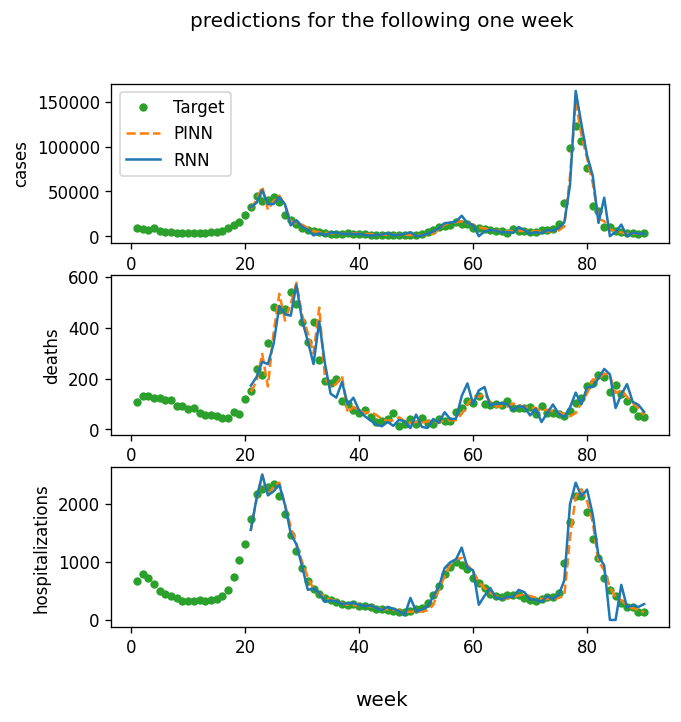

In [6]:
fig = plt.figure(figsize=(6, 6), dpi=120)
plt.subplot(3, 1, 1)
plt.plot(np.arange(1, 91), data_ref['cases'].reshape(-1)[20:110], 'o', color='tab:green', markersize=4, label='Target')
plt.plot(np.arange(21, 91), data_pinn['cases_pred_1w'].reshape(-1), '--', color='tab:orange', label="PINN")
plt.plot(np.arange(21, 91), data['pred'][3:, 0], '-', color='tab:blue', markersize=4, label='RNN')
plt.ylabel('cases')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(np.arange(1, 91), data_ref['deaths'].reshape(-1)[20:110], 'o', color='tab:green', markersize=4, label='Target')
plt.plot(np.arange(21, 91), data_pinn['deaths_pred_1w'].reshape(-1), '--', color='tab:orange', label="PINN")
plt.plot(np.arange(21, 91), data['pred'][3:, 1], '-', color='tab:blue', markersize=4, label='RNN')
plt.ylabel('deaths')

plt.subplot(3, 1, 3)
plt.plot(np.arange(1, 91), data_ref['hospitalized'].reshape(-1)[20:110], 'o', color='tab:green', markersize=4, label='Target')
plt.plot(np.arange(21, 91), data_pinn['hospitalized_pred_1w'].reshape(-1), '--', color='tab:orange', label="PINN")
plt.plot(np.arange(21, 91), data['pred'][3:, 2], '-', color='tab:blue', markersize=4, label='RNN')
plt.ylabel('hospitalizations')

fig.supxlabel("week")
fig.suptitle("predictions for the following one week")

# Plot predictions for 1-4 weeks

In [7]:
result_path = 'results/window=7/'

data_one_week = sio.loadmat(result_path + 'RNN_one_week.mat')
data_two_week = sio.loadmat(result_path + 'RNN_two_week.mat')
data_three_week = sio.loadmat(result_path + 'RNN_three_week.mat')
data_four_week = sio.loadmat(result_path + 'RNN_four_week.mat')

data = [data_one_week, data_two_week, data_three_week, data_four_week]

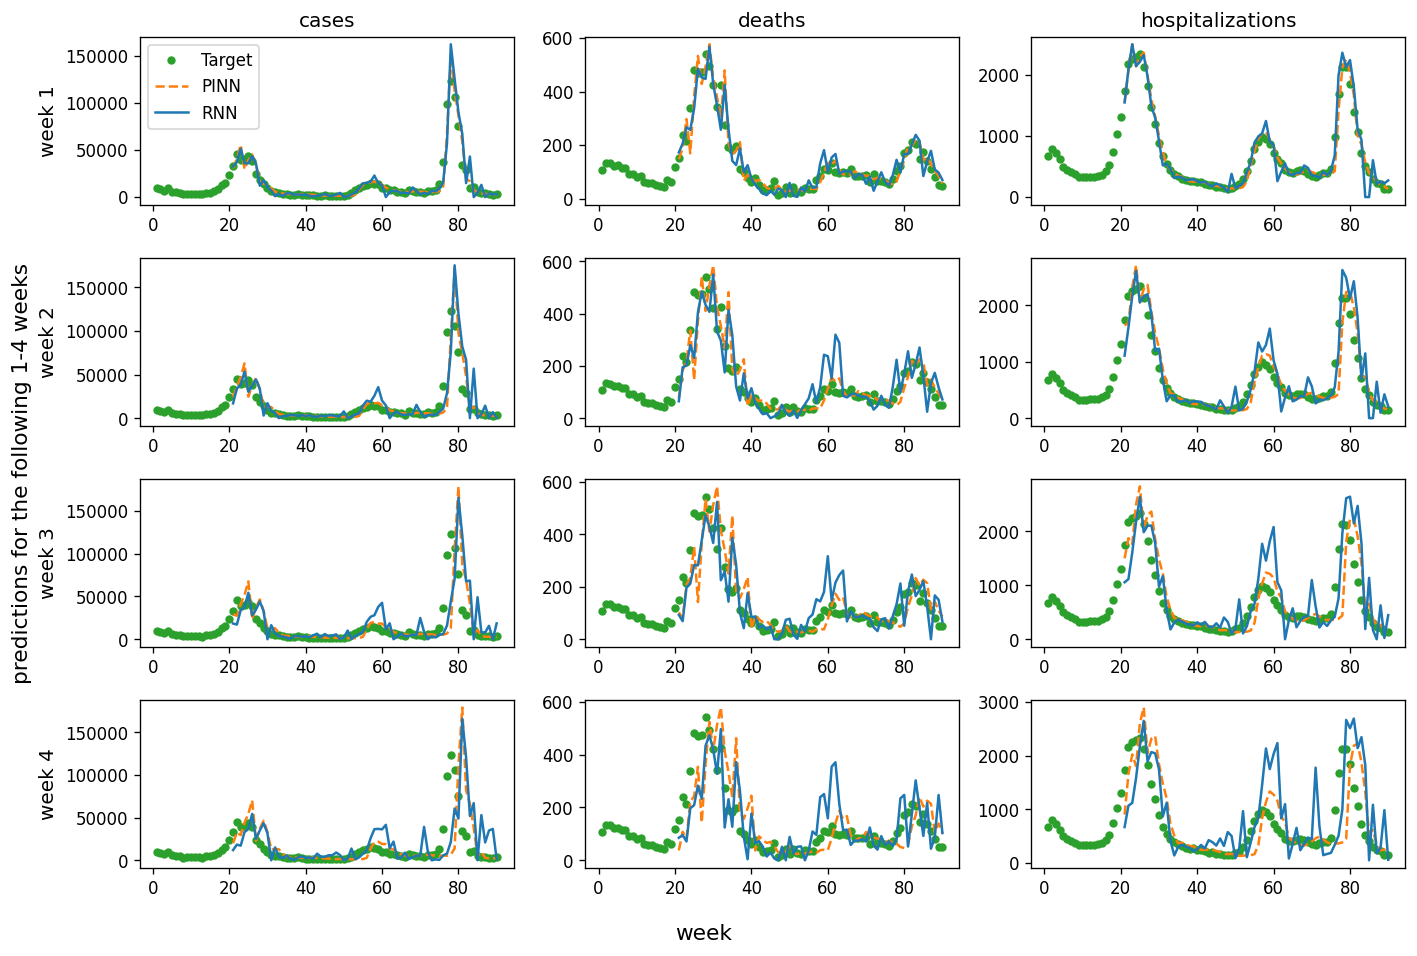

In [8]:
fig = plt.figure(figsize=(12, 8), dpi=120)
X, Y = 4, 3

for week in range(1, 5):
    plt.subplot(X, Y, Y * (week - 1) + 1)
    plt.plot(np.arange(1, 91), data_ref['cases'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'cases_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data[week-1]['pred'][4-week:, 0], '-', color='tab:blue', markersize=4, label='RNN')
    if week == 1:
        plt.title('cases', fontsize=12)
        plt.legend()
    plt.ylabel("week " + str(week), fontsize=12)

    plt.subplot(X, Y, Y * (week - 1) + 2)
    plt.plot(np.arange(1, 91), data_ref['deaths'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'deaths_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data[week-1]['pred'][4-week:, 1], '-', color='tab:blue', markersize=4, label='RNN')
    if week == 1:
        plt.title('deaths', fontsize=12)

    plt.subplot(X, Y, Y * (week - 1) + 3)
    plt.plot(np.arange(1, 91), data_ref['hospitalized'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'hospitalized_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data[week-1]['pred'][4-week:, 2], '-', color='tab:blue', markersize=4, label='RNN')
    if week == 1:
        plt.title('hospitalizations', fontsize=12)

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following 1-4 weeks", fontsize=13)
fig.tight_layout()

# Calculate MASE

In [9]:
window_list = [5, 7, 10, 15]
model = 'RNN'

print('<<<<<<<<<<<<<<<<<<<<<< MASE results of %s models >>>>>>>>>>>>>>>>>>>>' % (model))

for window_size in window_list:
    print("---------------------- window size: %d weeks ----------------------" % (window_size))
    result_path = 'results/window=%d/%s' % (window_size, model)

    data_one_week = sio.loadmat(result_path + '_one_week.mat')
    data_two_week = sio.loadmat(result_path + '_two_week.mat')
    data_three_week = sio.loadmat(result_path + '_three_week.mat')
    data_four_week = sio.loadmat(result_path + '_four_week.mat')

    data = [data_one_week, data_two_week, data_three_week, data_four_week]

    mase_cases_list = []
    for week in range(1, 5):
        mae_cases = mae(data_ref['cases'][40:110], data[week-1]['pred'][4-week:, 0])
        mae_cases_naive = mae(data_ref['cases'][40:110], data_ref['cases'][40-week:110-week])
        mase_cases = round(mae_cases / mae_cases_naive, 2)
#         print(r"mase_cases_%dw: %.2f" % (week, mase_cases))
        mase_cases_list.append(mase_cases)
    print('Cases: ', mase_cases_list)

    mase_deaths_list = []
    for week in range(1, 5):
        mae_deaths = mae(data_ref['deaths'][40:110], data[week-1]['pred'][4-week:, 1])
        mae_deaths_naive = mae(data_ref['deaths'][40:110], data_ref['deaths'][40-week:110-week])
        mase_deaths = round(mae_deaths / mae_deaths_naive, 2)
#         print(r"mase_deaths_%dw: %.2f" % (week, mase_deaths))
        mase_deaths_list.append(mase_deaths)
    print('Deaths: ', mase_deaths_list)
        
    mase_hosp_list = []
    for week in range(1, 5):
        mae_hosp = mae(data_ref['hospitalized'][40:110], data[week-1]['pred'][4-week:, 2])
        mae_hosp_naive = mae(data_ref['hospitalized'][40:110], data_ref['hospitalized'][40-week:110-week])
        mase_hosp = round(mae_hosp / mae_hosp_naive, 2)
#         print(r"mase_hospitalized_%dw: %.2f" % (week, mase_hosp))
        mase_hosp_list.append(mase_hosp)
    print('Hosp: ', mase_hosp_list)

<<<<<<<<<<<<<<<<<<<<<< MASE results of RNN models >>>>>>>>>>>>>>>>>>>>
---------------------- window size: 5 weeks ----------------------
Cases:  [1.11, 0.97, 0.98, 0.94]
Deaths:  [1.22, 1.21, 1.0, 1.07]
Hosp:  [0.83, 0.92, 0.99, 1.06]
---------------------- window size: 7 weeks ----------------------
Cases:  [1.09, 1.08, 1.07, 1.09]
Deaths:  [1.17, 1.27, 1.01, 0.95]
Hosp:  [0.86, 0.86, 0.91, 1.02]
---------------------- window size: 10 weeks ----------------------
Cases:  [1.06, 0.96, 1.01, 1.04]
Deaths:  [1.35, 1.43, 1.22, 1.14]
Hosp:  [0.79, 0.89, 0.98, 1.07]
---------------------- window size: 15 weeks ----------------------
Cases:  [1.02, 1.11, 1.13, 1.09]
Deaths:  [1.47, 1.38, 1.26, 1.2]
Hosp:  [0.88, 1.0, 1.13, 1.24]
